In [50]:
import os
import numpy as np
import PIL as pil
import matplotlib.pyplot as plt
import cv2
from skimage.feature import peak_local_max
from scipy.signal import find_peaks

DATA_PATH = r'C:\Users\user\Desktop\CV Training Guy\CV_training\computer_vision\course_resources\ps_1'

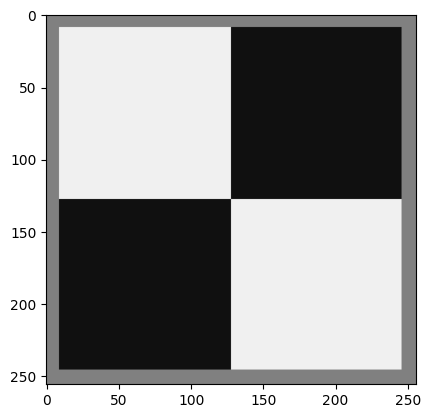

In [3]:
checkerboard_img = cv2.imread(os.path.join(DATA_PATH, 'ps1-input0.png'))
plt.imshow(cv2.cvtColor(checkerboard_img, cv2.COLOR_BGR2RGB))
plt.show()

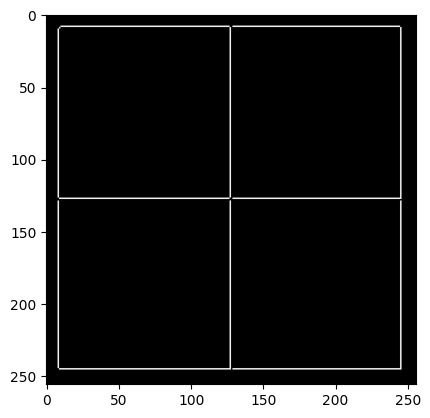

In [4]:
edges = cv2.Canny(checkerboard_img, 100, 200)
plt.imshow(edges, cmap='gray')

In [186]:
def hough_lines_acc(edges, theta_res=5000, bins=128):
    edges_coords = np.argwhere(edges > 0)
    theta = np.linspace(-np.pi / 2, np.pi / 2, theta_res)[:, np.newaxis]
    d = edges_coords[:, 1] * np.cos(theta) + edges_coords[:, 0] * np.sin(theta)
    ds = d.ravel()
    thetas = np.repeat(theta, edges_coords.shape[0])
    H, dedges, tedges = np.histogram2d(ds, thetas, bins=bins)
    return H, dedges, tedges


def hough_peaks(H, max_peaks=10, min_distance=5):
    peaks_indices = peak_local_max(H, num_peaks=max_peaks, exclude_border=False, min_distance=min_distance)
    dvalues = 0.5 * (dedges[:-1] + dedges[1:])
    tvalues = 0.5 * (tedges[:-1] + tedges[1:])
    peaks_values = np.array([dvalues[peaks_indices[:, 0]], tvalues[peaks_indices[:, 1]]]).T
    return peaks_values, peaks_indices


def draw_lines_on_image(image, d_theta_array, color=255, thickness=1):
    h, w = image.shape[:2]
    img_copy = image.copy()

    for d, theta in d_theta_array:
        cos_t = np.cos(theta)
        sin_t = np.sin(theta)

        if abs(sin_t) > 1e-6:
            y1 = (d - cos_t * 0) / sin_t
            y2 = (d - cos_t * (w - 1)) / sin_t
            p1 = (0, int(round(y1)))
            p2 = (w - 1, int(round(y2)))
        else:
            x = int(round(d / cos_t))
            p1 = (x, 0)
            p2 = (x, h - 1)

        # Only draw if points are within reasonable bounds
        # if (0 <= p1[0] < w or 0 <= p2[0] < w) and (0 <= p1[1] < h or 0 <= p2[1] < h):
        cv2.line(img_copy, p1, p2, color, thickness)

    return img_copy


def annotate_image(image, xedges, yedges, points, marker='o', color='red', size=40):
    x = points[:, 0]
    y = points[:, 1]

    plt.imshow(image,
               cmap='gray' if image.ndim == 2 else None)
    plt.scatter(x, y, marker=marker, c=color, s=size)
    xvals = 0.5 * (xedges[:-1] + xedges[1:])
    yvals = 0.5 * (yedges[:-1] + yedges[1:])
    plt.xticks(ticks=np.arange(len(xvals))[::15],
               labels=np.round(xvals[::15], 1))
    plt.yticks(ticks=np.arange(len(yvals))[::15],
               labels=np.round(yvals[::15], 1))
    plt.xlabel("d")
    plt.ylabel("theta")
    plt.title("Hough Space")
    plt.grid(False)
    plt.show()


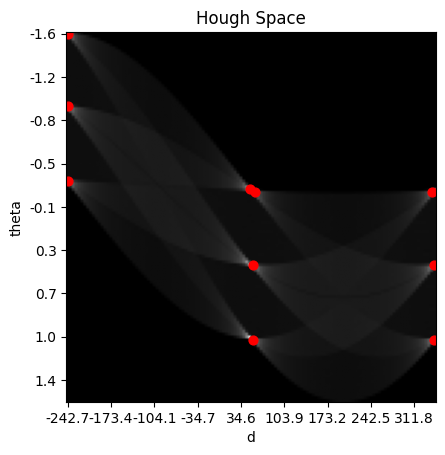

In [189]:
H, dedges, tedges = hough_lines_acc(edges)
peaks_values, peaks_indices = hough_peaks(H, max_peaks=10, min_distance=1)
annotate_image(H, dedges, tedges, peaks_indices[:,::-1])

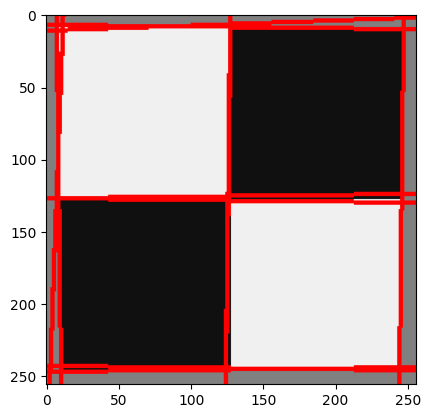

In [193]:
img_with_lines = draw_lines_on_image(checkerboard_img, peaks_values, thickness=2)
plt.imshow(img_with_lines, cmap='gray')